# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [3]:
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
#No of Bank subscribed on term depost
df['y'].value_counts(normalize=True)

,proportion
y,
no,0.887346
yes,0.112654


In [6]:
#poutcome: outcome current campaign rate
poutcome=df[df.poutcome != 'nonexistent'].poutcome.apply(lambda x: 1 if x == 'success' else 0)
outcomes = df.y.apply(lambda x: 1 if x == 'yes' else 0)

print('Number of records:', len(df))
print('Success Rate (Current Campaign):', outcomes.sum() / len(df))
print('Success Rate (Previous Campaign):', poutcome.sum() / len(poutcome))

Number of records: 41188
Success Rate (Current Campaign): 0.11265417111780131
Success Rate (Previous Campaign): 0.24408888888888888


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
#checking missing values in the file
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [9]:
#show bank cloumns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [10]:
bank_client = df.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [11]:
#Knowing categorical variables
print('Jobs:\n' ,bank_client['job'].unique())
print('Marital:\n' ,bank_client['marital'].unique())
print('Education:\n' ,bank_client['education'].unique())
print('Default:\n', bank_client['default'].unique())
print('Housing:\n', bank_client['housing'].unique())
print('Loan:\n', bank_client['loan'].unique())

Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Marital:
 ['married' 'single' 'divorced' 'unknown']
Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['no' 'yes' 'unknown']


In [12]:
#Trying to find some strange values or null values
print('Min age: ', bank_client['age'].max())
print('Max age: ', bank_client['age'].min())
print('Null Values: ', bank_client['age'].isnull().any())

Min age:  98
Max age:  17
Null Values:  False


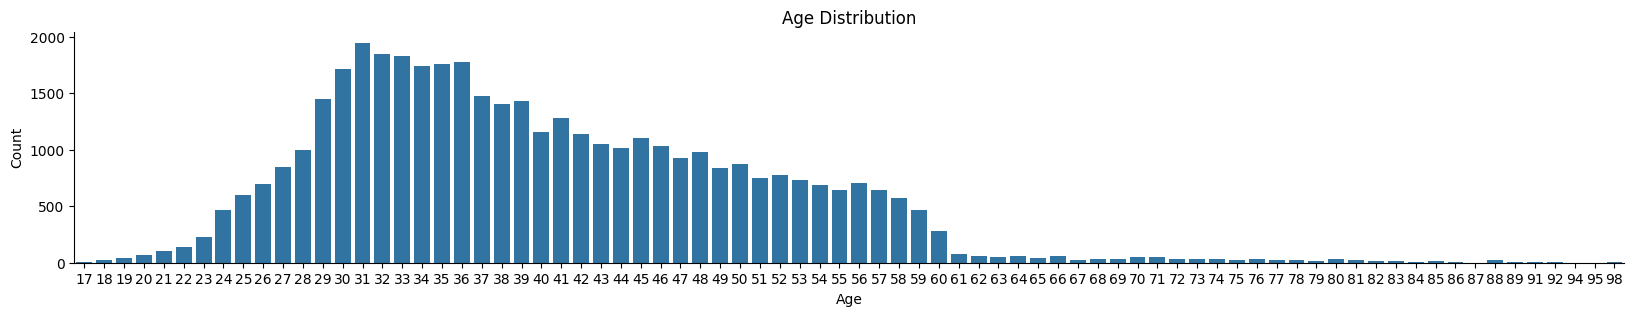

In [13]:
#plot a chart to show age distribution of bank clients
fig,ax=plt.subplots()
fig.set_size_inches(20,3)
ax.set_title('Age Distribution')
sns.countplot(x='age',data=bank_client)
ax.set_xlabel('Age', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
sns.despine()

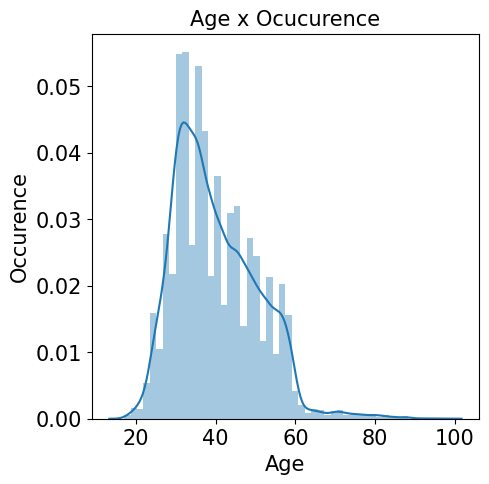

In [14]:
fig,ax=plt.subplots()
fig.set_size_inches(5,5)
sns.distplot(bank_client['age'])
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Occurence', fontsize=15)
ax.set_title('Age x Ocucurence', fontsize=15)
ax.tick_params(labelsize=15)

In [15]:
#Calculate the outliers using IQR Method
print('Min age: ', bank_client['age'].min())
print('Max age: ', bank_client['age'].max())
print('Age above {0} are outliers. '.format(bank_client['age'].quantile(q = 0.75) + 1.5*(bank_client['age'].quantile(q = 0.75) - bank_client['age'].quantile(q = 0.25))))

Min age:  17
Max age:  98
Age above 69.5 are outliers. 


In [16]:
#percentage of age outliers
print('outliers: ', round(bank_client[bank_client['age']>69.5]['age'].count() *100/len(bank_client),2))
#mean
print('mean: ', bank_client['age'].mean())
#median
print('median: ', bank_client['age'].median())
#std
print('std: ', bank_client['age'].std())
#coeffcient variation
print('coeffcient variation: ', bank_client['age'].std() *100/bank_client['age'].mean())

outliers:  1.14
mean:  40.02406040594348
median:  38.0
std:  10.421249980934235
coeffcient variation:  26.037463154004993


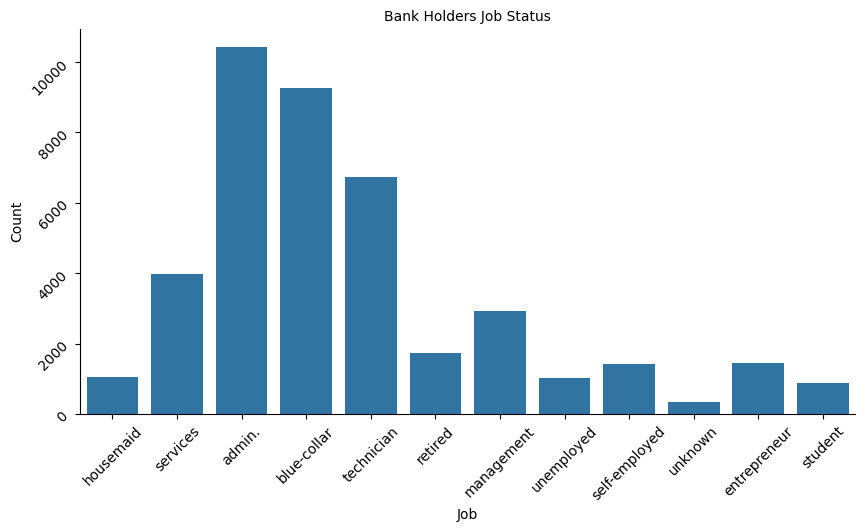

In [17]:
#Bank holders job status
fig,ax=plt.subplots()
fig.set_size_inches(10,5)
sns.countplot(x='job',data=bank_client)
ax.set_xlabel('Job', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.tick_params(labelsize=10,rotation=45)
ax.set_title('Bank Holders Job Status', fontsize=10)
sns.despine()

Text(0.5, 0, 'Marital')

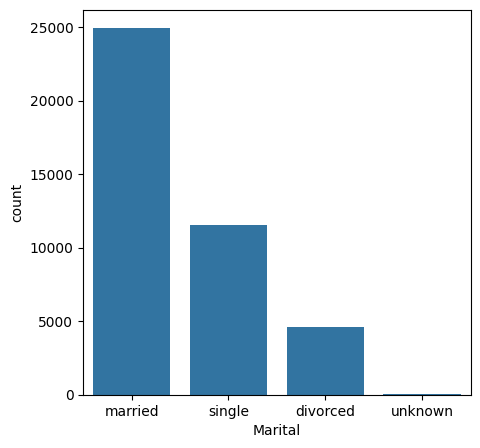

In [18]:
#Martial status of bank holders
fig,ax=plt.subplots()
fig.set_size_inches(5,5)
sns.countplot(x='marital',data=bank_client)
ax.set_xlabel('Marital', fontsize=10)

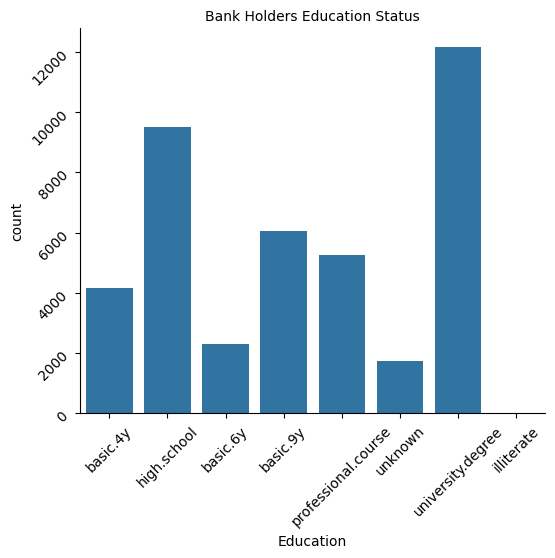

In [19]:
#Education of the bank holders
fig,ax=plt.subplots()
fig.set_size_inches(6,5)
sns.countplot(x='education',data=bank_client)
ax.set_xlabel('Education', fontsize=10)
ax.tick_params(labelsize=10,rotation=45)
ax.set_title('Bank Holders Education Status', fontsize=10)
sns.despine()

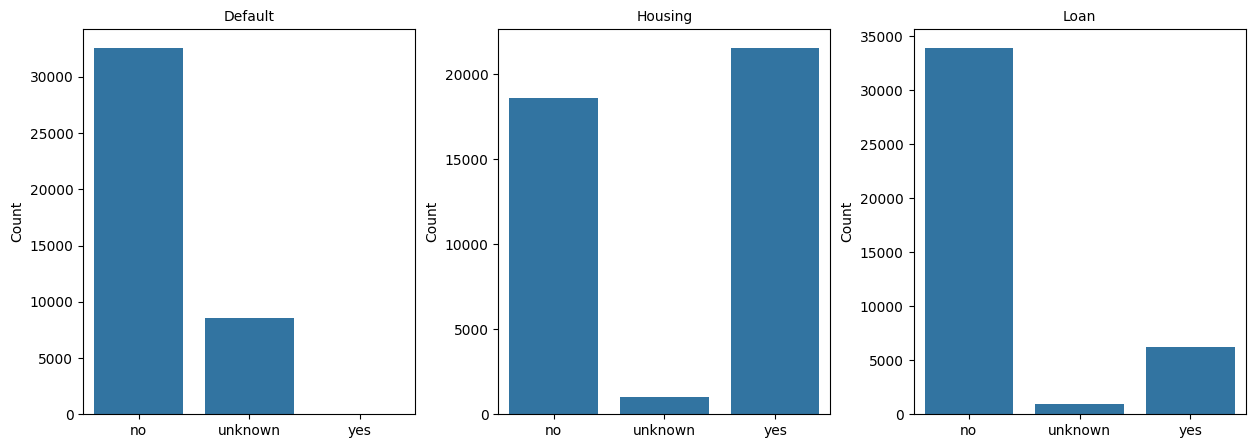

In [20]:
#Default has credit?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
sns.countplot(x = 'default', data = bank_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=10)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=10)
ax1.tick_params(labelsize=10)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = bank_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=10)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=10)
ax2.tick_params(labelsize=10)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = bank_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=10)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=10)
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

In [21]:
#For categorical column
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job'] = labelencoder_X.fit_transform(bank_client['job'])
bank_client['marital'] = labelencoder_X.fit_transform(bank_client['marital'])
bank_client['education'] = labelencoder_X.fit_transform(bank_client['education'])
bank_client['default'] = labelencoder_X.fit_transform(bank_client['default'])
bank_client['housing'] = labelencoder_X.fit_transform(bank_client['housing'])
bank_client['loan'] = labelencoder_X.fit_transform(bank_client['loan'])


In [22]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4

    return dataframe

age(bank_client);
bank_client.head()

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


In [23]:
#Related with the last contact of the current campaign
bank_related = df.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [24]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact'])
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month'])
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week'])


In [25]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']   = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration']   = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank_related);
bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,3
1,1,6,1,2
2,1,6,1,3
3,1,6,1,2
4,1,6,1,3


In [26]:
#Social and economic context attributes
bank_se = df.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()
#Other context attributes
bank_o = df.loc[: , ['campaign', 'pdays','previous', 'poutcome']]

bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,1
1,1,999,0,1
2,1,999,0,1
3,1,999,0,1
4,1,999,0,1


In [27]:
bank_final= pd.concat([bank_client, bank_related, bank_se, bank_o], axis = 1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx',
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
y = pd.get_dummies(df['y'], columns = ['y'], prefix = ['y'], drop_first = True)
bank_final.shape

(41188, 20)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_final,y, test_size = 0.2, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [35]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_pred = log_reg.predict(X_test)
#confusion matrix
log_confustion_matrix=confusion_matrix(y_test, log_pred)
print('The Confusion Matrix \n',+log_confustion_matrix,end='\n\n')


The Confusion Matrix 
 [[7099  180]
 [ 614  345]]



### Problem 9: Score the Model

What is the accuracy of your model?

In [36]:
#accuracy
log_train_accuracy = round(log_reg.score(X_train, y_train),2)*100
log_accuracy = round(accuracy_score(y_test, log_pred),2)*100
#cross validation score
log_cv_scores = cross_val_score(log_reg, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean()
print('The Accuracy Score \n {0}'.format(log_accuracy))
print('The Cross Validation Score \n {0}'.format(log_cv_scores))

The Accuracy Score 
 90.0
The Cross Validation Score 
 0.9092867981790592


In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
#Confusion Matrix
knn_confustion_matrix=confusion_matrix(y_test, knn_pred)
print('The Confusion Matrix \n',+knn_confustion_matrix,end='\n\n')
#accuracy
knn_train_accuracy = round(knn.score(X_train, y_train),2)*100
knn_accuracy = round(accuracy_score(y_test, knn_pred),2)*100
#cross validation score
knn_cv_scores = cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean()
print('The Accuracy Score \n {0}'.format(knn_accuracy))
print('The Cross Validation Score \n {0}'.format(knn_cv_scores))

The Confusion Matrix 
 [[7028  251]
 [ 622  337]]

The Accuracy Score 
 89.0
The Cross Validation Score 
 0.9009408194233688


In [50]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
#Confusion Matrix
dt_confustion_matrix=confusion_matrix(y_test, dt_pred)
print('The Confusion Matrix \n',+dt_confustion_matrix,end='\n\n')
#accuracy
dt_train_accuracy = round(dt.score(X_train, y_train),2)*100
dt_accuracy = round(accuracy_score(y_test, dt_pred),2)*100
#cross validation score
dt_cv_scores = cross_val_score(dt, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean()
print('The Accuracy Score \n {0}'.format(dt_accuracy))
print('The Cross Validation Score \n {0}'.format(dt_cv_scores))

The Confusion Matrix 
 [[6813  466]
 [ 504  455]]

The Accuracy Score 
 88.0
The Cross Validation Score 
 0.8845220030349014


In [51]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
#Confusion Matrix
svm_confustion_matrix=confusion_matrix(y_test, svm_pred)
print('The Confusion Matrix \n',+svm_confustion_matrix,end='\n\n')
#accuracy
svm_train_accuracy = round(svm.score(X_train, y_train),2)*100
svm_accuracy = round(accuracy_score(y_test, svm_pred),2)*100
#cross validation score
svm_cv_scores = cross_val_score(svm, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean()
print('The Accuracy Score \n {0}'.format(svm_accuracy))
print('The Cross Validation Score \n {0}'.format(svm_cv_scores))

The Confusion Matrix 
 [[7193   86]
 [ 757  202]]

The Accuracy Score 
 90.0
The Cross Validation Score 
 0.8974810318664643


In [52]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
#confusion matrix
xgb_confustion_matrix=confusion_matrix(y_test, xgb_pred)
print('The Confusion Matrix \n',+xgb_confustion_matrix,end='\n\n')
#accuracy
xgb_train_accuracy = round(xgb.score(X_train, y_train),2)*100
xgb_accuracy = round(accuracy_score(y_test, xgb_pred),2)*100
#cross validation score
xgb_cv_scores = cross_val_score(xgb, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean()
print('The Accuracy Score \n {0}'.format(xgb_accuracy))
print('The Cross Validation Score \n {0}'.format(xgb_cv_scores))

The Confusion Matrix 
 [[6995  284]
 [ 496  463]]

The Accuracy Score 
 91.0
The Cross Validation Score 
 0.9109559939301972


In [53]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc= gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
#confusion matrix
gbc_confustion_matrix=confusion_matrix(y_test, gbc_pred)
print('The Confusion Matrix \n',+gbc_confustion_matrix,end='\n\n')
#accuracy
gbc_train_accuracy = round(gbc.score(X_train, y_train),2)*100
gbc_accuracy = round(accuracy_score(y_test, gbc_pred),2)*100
#cross validation score
gbc_cv_scores = cross_val_score(gbc, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean()
print('The Accuracy Score \n {0}'.format(gbc_accuracy))
print('The Cross Validation Score \n {0}'.format(gbc_cv_scores))

The Confusion Matrix 
 [[7023  256]
 [ 487  472]]

The Accuracy Score 
 91.0
The Cross Validation Score 
 0.9142033383915023


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [54]:
models = pd.DataFrame({
                'Models': ['Logistic Regression', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'XGBoost', 'Gradient Boosting'],
                'Train Time': [0, 0, 0, 0, 0, 0],
                'Train Accuracy': [log_train_accuracy, dt_train_accuracy, svm_train_accuracy, knn_train_accuracy,
                               xgb_train_accuracy, gbc_train_accuracy],
                'Test Accuracy':  [log_accuracy, dt_accuracy, svm_accuracy, knn_accuracy,  xgb_accuracy, gbc_accuracy],
                'CV Score': [log_cv_scores, dt_cv_scores, svm_cv_scores, knn_cv_scores, xgb_cv_scores, gbc_cv_scores]

                })

models

,Models,Train Time,Train Accuracy,Test Accuracy,CV Score
0,Logistic Regression,0,91.0,90.0,0.909287
1,Decision Tree Classifier,0,100.0,88.0,0.884522
2,Support Vector Machine,0,90.0,90.0,0.897481
3,K-Near Neighbors,0,93.0,89.0,0.900941
4,XGBoost,0,95.0,91.0,0.910956
5,Gradient Boosting,0,92.0,91.0,0.914203


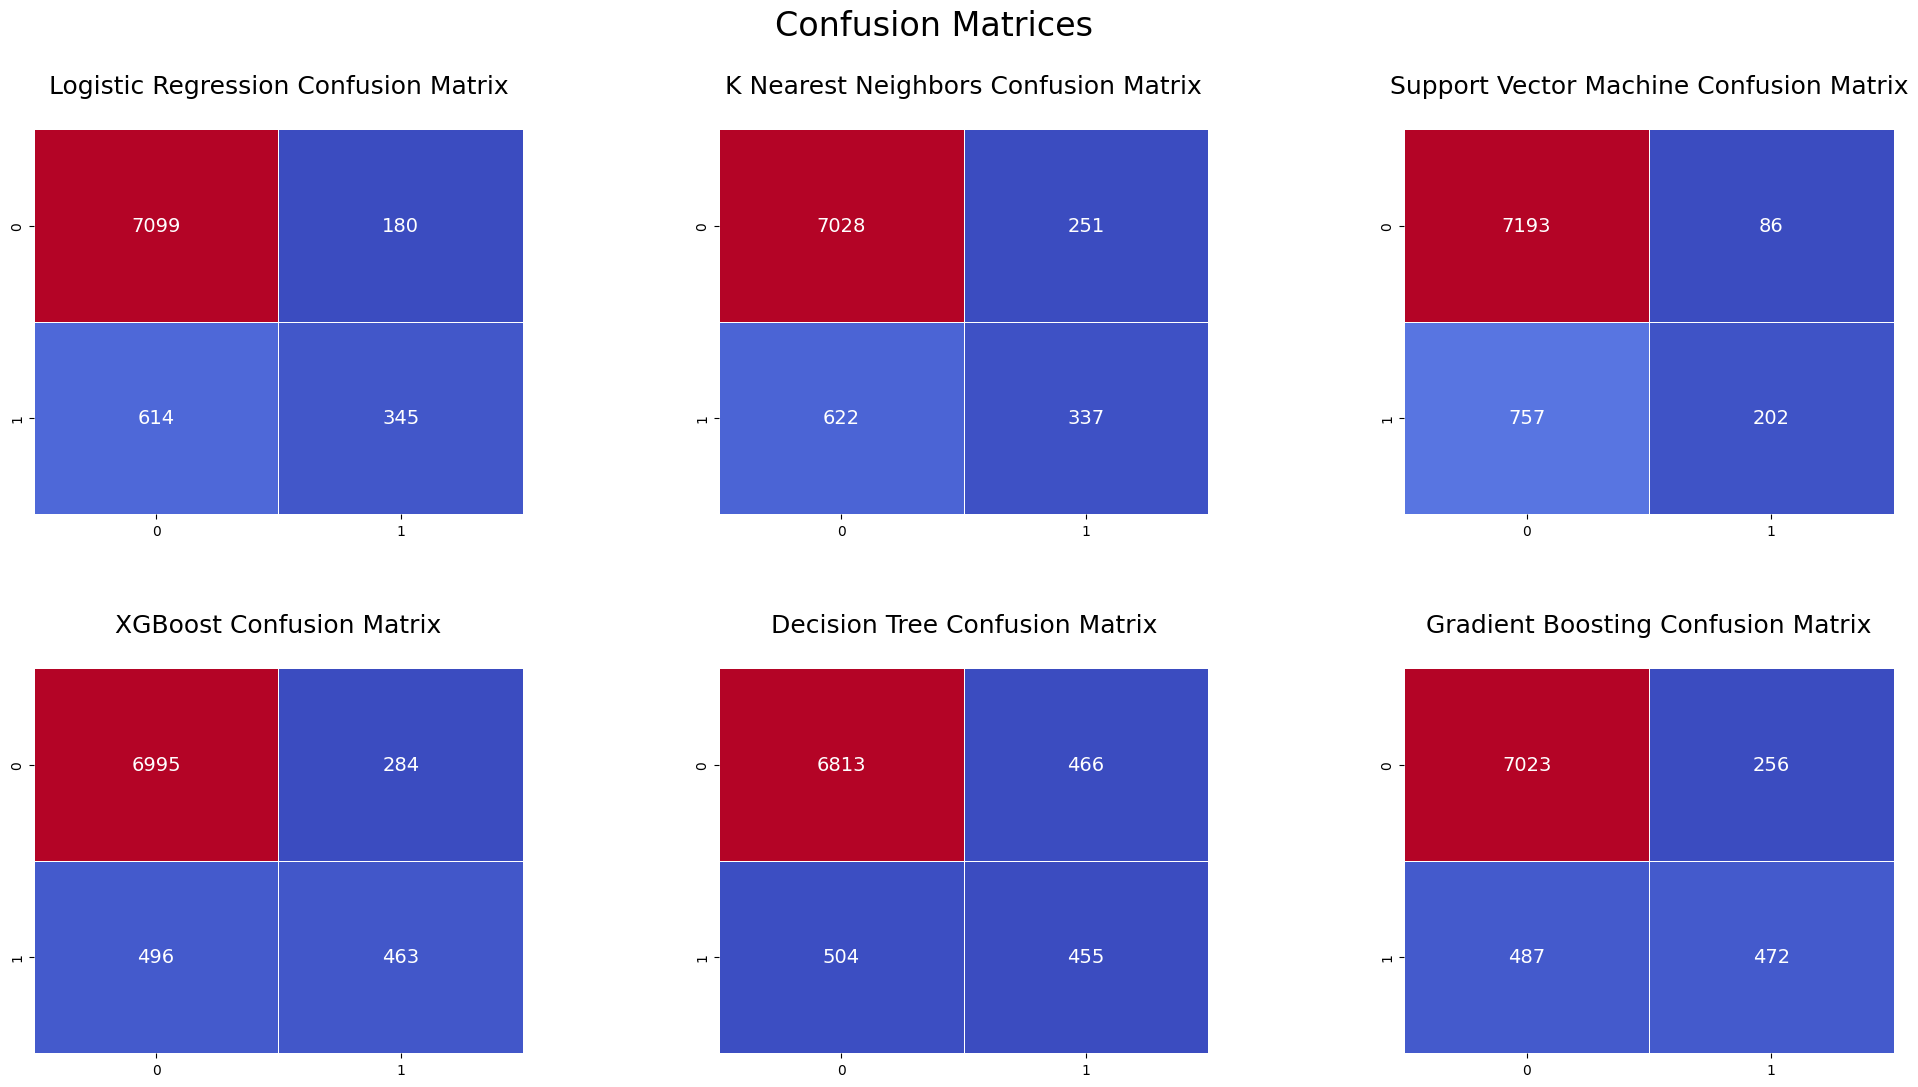

In [55]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrices",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix\n", fontsize=18)
sns.heatmap(log_confustion_matrix,annot=True,cmap="coolwarm",fmt="d", linewidths=.5, cbar=False, annot_kws={"size": 14})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix\n", fontsize=18)
sns.heatmap(knn_confustion_matrix,annot=True,cmap="coolwarm",fmt="d", linewidths=.5, cbar=False, annot_kws={"size": 14})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix\n", fontsize=18)
sns.heatmap(svm_confustion_matrix,annot=True,cmap="coolwarm",fmt="d", linewidths=.5, cbar=False, annot_kws={"size": 14})

plt.subplot(2,3,4)
plt.title("XGBoost Confusion Matrix\n", fontsize=18)
sns.heatmap(xgb_confustion_matrix,annot=True,cmap="coolwarm",fmt="d", linewidths=.5, cbar=False, annot_kws={"size": 14})

plt.subplot(2,3,5)
plt.title("Decision Tree Confusion Matrix\n", fontsize=18)
sns.heatmap(dt_confustion_matrix,annot=True,cmap="coolwarm",fmt="d", linewidths=.5, cbar=False, annot_kws={"size": 14})

plt.subplot(2,3,6)
plt.title("Gradient Boosting Confusion Matrix\n", fontsize=18)
sns.heatmap(gbc_confustion_matrix,annot=True,cmap="coolwarm",fmt="d", linewidths=.5, cbar=False, annot_kws={"size": 14})

plt.show()


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### Questions